In [63]:
import pandas as pd
import plotly.express as px


In [64]:
# link para pegar dados do git hub

url = 'https://raw.githubusercontent.com/mapaslivres/municipios-br/main/tabelas/municipios.csv'

In [65]:
# codigo para ler o arquivo csv que incluimos acima

dados_brasil = pd.read_csv(url)

In [66]:
# O DataFrame é uma união de várias Series sob um mesmo index, o seu formato é de uma tabela, onde os dados são organizados em linhas e colunas. 

df = pd.DataFrame(dados_brasil)
# para mostrar o dado podemos utiliar tanto o print qunato o nome da variavel que desejamos ve
df

,municipio,uf,uf_code,name,mesoregion,microregion,rgint,rgi,osm_relation_id,wikidata_id,is_capital,wikipedia_pt,lon,lat,no_accents,slug_name,alternative_names,pop_21
0,1100015,11,RO,Alta Floresta d'Oeste,1102,11006,1102,110005,325842,Q1761456,NaN,Alta Floresta d'Oeste,-61.999824,-11.935540,Alta Floresta d'Oeste,alta-floresta-doeste,NaN,22516
1,1100023,11,RO,Ariquemes,1102,11003,1101,110002,325888,Q1646975,NaN,Ariquemes,-63.033269,-9.908463,Ariquemes,ariquemes,NaN,111148
2,1100031,11,RO,Cabixi,1102,11008,1102,110006,325882,Q940433,NaN,Cabixi,-60.544314,-13.499763,Cabixi,cabixi,NaN,5067
3,1100049,11,RO,Cacoal,1102,11006,1102,110005,325872,Q1761637,NaN,Cacoal,-61.442944,-11.433865,Cacoal,cacoal,NaN,86416
4,1100056,11,RO,Cerejeiras,1102,11008,1102,110006,325883,Q1803210,NaN,Cerejeiras,-60.818426,-13.195033,Cerejeiras,cerejeiras,NaN,16088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5222005,52,GO,Vianópolis,5205,52016,5201,520002,334495,Q22067073,NaN,Vianópolis,-48.513471,-16.742081,Vianopolis,vianopolis,NaN,14088
5566,5222054,52,GO,Vicentinópolis,5205,52015,5202,520009,334491,Q940869,NaN,Vicentinópolis,-49.807239,-17.732662,Vicentinopolis,vicentinopolis,NaN,9002
5567,5222203,52,GO,Vila Boa,5204,52012,5206,520022,334493,Q1025753,NaN,Vila Boa (Goiás),-47.057361,-15.034889,Vila Boa,vila-boa,NaN,6451
5568,5222302,52,GO,Vila Propício,5204,52012,5205,520018,334444,Q989519,NaN,Vila Propício,-48.882422,-15.454635,Vila Propicio,vila-propicio,NaN,5941


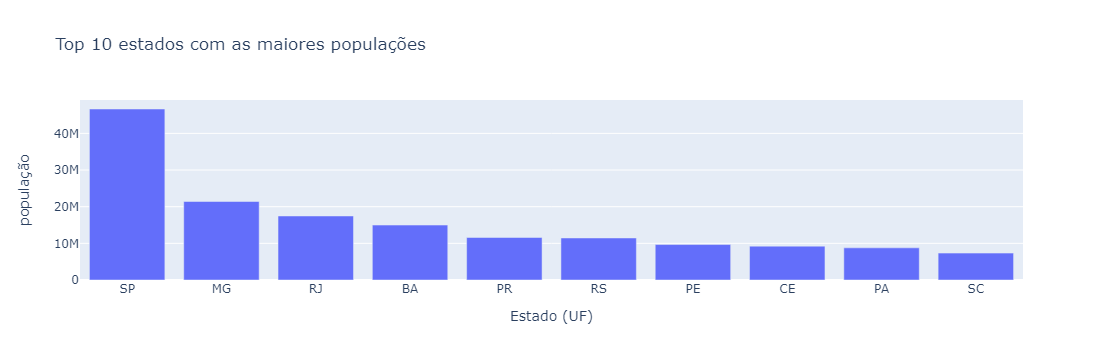

In [ ]:
# agrupando os dados por ud e somando a coluna porp_21 (população) # index é o índice de uma lista
df_maiores_estados = df.groupby('uf_code', as_index=False)['pop_21'].sum()
# ordenando os dados em ordem descrecente
df_maiores_estados = df_maiores_estados.sort_values(by='pop_21', ascending=False)
# lendo os 10 primeiros estados com Data Frame
df_maiores_estados = df_maiores_estados.head(10)
# print com a variavel 

df_maiores_estados

# exportando a biblioteca de graficos, .bar é o tipo e grafico, os; a lista x precisa ser do mesmo tamanho da y
fig = px.bar( #px.bar cria um grafico de barras
     x=df_maiores_estados["uf_code"], # colocando a coluna UF_code no eixo x
     y=df_maiores_estados["pop_21"], # colocando a coluna pop_21 code no eixo y
     title="Top 10 estados com as maiores populações" # adicionando ttitulo no grafico
)

# setando nomes para os eixos x e y
fig.update_layout(xaxis_title="Estado (UF)", yaxis_title="população")

# exibir codigo
fig

In [68]:
# pegando do data frame principal apenas as cidades de ap
df_cidades_sp = df[df['uf_code'] == 'SP']
df_cidades_sp

,municipio,uf,uf_code,name,mesoregion,microregion,rgint,rgi,osm_relation_id,wikidata_id,is_capital,wikipedia_pt,lon,lat,no_accents,slug_name,alternative_names,pop_21
3267,3500105,35,SP,Adamantina,3508,35035,3505,350019,298151,Q1637498,NaN,Adamantina,-51.073365,-21.688311,Adamantina,adamantina,NaN,35153
3268,3500204,35,SP,Adolfo,3501,35004,3507,350025,298302,Q676044,NaN,Adolfo (São Paulo),-49.649721,-21.232730,Adolfo,adolfo,NaN,3545
3269,3500303,35,SP,Aguaí,3507,35029,3510,350044,298431,Q1760037,NaN,Aguaí,-46.979693,-22.059684,Aguai,aguai,NaN,36981
3270,3500402,35,SP,Águas da Prata,3507,35030,3510,350044,298075,Q1647805,NaN,Águas da Prata,-46.716767,-21.934829,Aguas da Prata,aguas-da-prata,NaN,8262
3271,3500501,35,SP,Águas de Lindóia,3507,35033,3510,350048,298061,Q249869,NaN,Águas de Lindóia,-46.631779,-22.473822,Aguas de Lindoia,aguas-de-lindoia,NaN,18908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,3557006,35,SP,Votorantim,3512,35046,3502,350003,297909,Q942083,NaN,Votorantim,-47.449738,-23.541871,Votorantim,votorantim,NaN,124468
3908,3557105,35,SP,Votuporanga,3501,35003,3507,350027,298439,Q1759612,NaN,Votuporanga,-49.974672,-20.419470,Votuporanga,votuporanga,NaN,96106
3909,3557154,35,SP,Zacarias,3501,35004,3506,350023,298089,Q1760645,NaN,Zacarias (São Paulo),-50.055740,-21.050110,Zacarias,zacarias,NaN,2784
3910,3557204,35,SP,Chavantes,3510,35040,3504,350015,298493,Q1795758,NaN,Chavantes,-49.713936,-23.032006,Chavantes,chavantes,NaN,12418


In [69]:
# somando toda a população de SP

população_sp = df_cidades_sp['pop_21'].sum()

população_sp




46649132

In [70]:
# pegando as 10 maiores cidades 

maiores_cidades_sp = df_cidades_sp.nlargest(10,'pop_21')[['name', 'pop_21']] # nlarges conseguimos definir a qtd de elementos que queremos ordenando eles
maiores_cidades_sp 

,name,pop_21
3829,São Paulo,12396372
3479,Guarulhos,1404694
3375,Campinas,1223237
3811,São Bernardo do Campo,849874
3824,São José dos Campos,737310
3801,Santo André,723889
3754,Ribeirão Preto,720116
3654,Osasco,701428
3848,Sorocaba,695328
3597,Mauá,481725


In [71]:
# total cidades top 10

total_cidades_top_10 = maiores_cidades_sp['pop_21'].sum()
total_cidades_top_10

19933973

In [72]:
# subtraindo a população das 10 maiores cidades de qts total existente

outras_cidades = população_sp - total_cidades_top_10
outras_cidades

26715159

In [73]:

df_outras = pd.DataFrame({
        'name': ['outros'],
        'pop_21' : [outras_cidades] 
        
})

df_outras



,name,pop_21
0,outros,26715159


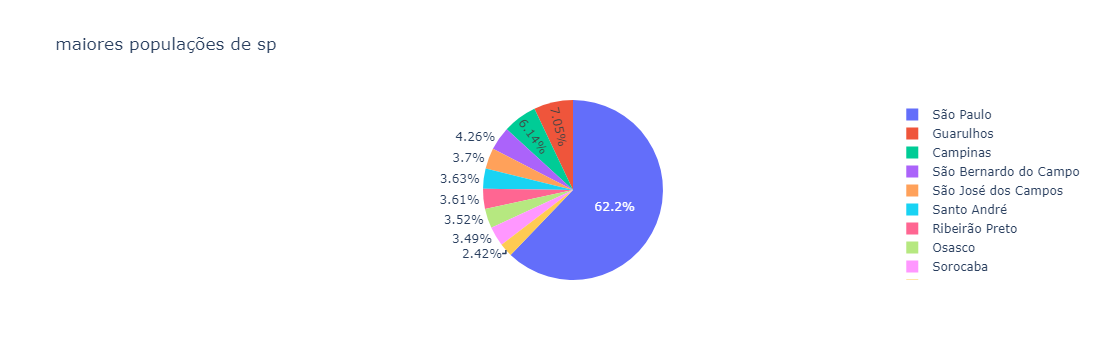

In [75]:

maiores_cidades_sp
 
fig= px.pie(

    maiores_cidades_sp,

    values='pop_21',

    names='name',

    title='maiores populações de sp'

)

fig